In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\DERM\DERM_AN_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,1,1,1,1,NaN,0.0,NaN,2,2,...,0.0,0,NaN,0,NaN,0.0,NaN,0,NaN,0
1,1,1,2,0,0,0.0,3.0,0.0,3,0,...,0.0,0,0.0,0,0.0,2.0,2.0,2,0.0,7
2,2,2,1,0,0,0.0,3.0,0.0,2,0,...,0.0,0,0.0,2,0.0,3.0,3.0,2,0.0,7
3,2,2,2,1,0,NaN,2.0,NaN,2,2,...,0.0,0,NaN,2,NaN,2.0,NaN,2,NaN,7
4,2,2,1,0,0,0.0,2.0,0.0,2,0,...,0.0,0,0.0,3,0.0,2.0,2.0,2,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2,2,0,2,1,0.0,0.0,0.0,0,0,...,0.0,0,0.0,3,0.0,0.0,0.0,3,0.0,70
354,2,3,2,0,0,NaN,0.0,NaN,3,2,...,NaN,0,NaN,0,0.0,0.0,NaN,1,NaN,70
355,2,2,2,1,0,NaN,NaN,NaN,0,0,...,NaN,0,0.0,2,NaN,NaN,0.0,2,NaN,70
356,2,1,0,3,0,NaN,0.0,0.0,0,0,...,NaN,0,NaN,0,NaN,0.0,NaN,1,NaN,70


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
int64		column 2	0
int64		column 3	0
int64		column 4	0
int64		column 5	0
float64		column 6	73
float64		column 7	18
float64		column 8	55
int64		column 9	0
int64		column 10	0
int64		column 11	0
float64		column 12	73
int64		column 13	0
int64		column 14	0
int64		column 15	0
int64		column 16	0
int64		column 17	0
int64		column 18	0
int64		column 19	0
int64		column 20	0
int64		column 21	0
float64		column 22	55
int64		column 23	0
int64		column 24	0
float64		column 25	55
int64		column 26	0
float64		column 27	55
int64		column 28	0
float64		column 29	54
float64		column 30	18
float64		column 31	55
int64		column 32	0
float64		column 33	73
int64		column 34	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,358.000000,358.000000,358.000000,358.000000,358.000000,285.000000,340.000000,303.000000,358.000000,358.000000,...,303.000000,358.000000,303.000000,358.000000,304.000000,340.000000,303.000000,358.000000,285.000000,358.000000
mean,2.078212,1.807263,1.569832,1.354749,0.636872,0.473684,0.152941,0.419142,0.622905,0.530726,...,0.425743,0.474860,0.452145,0.949721,0.480263,0.094118,0.105611,1.877095,0.582456,36.296089
std,0.664865,0.701541,0.900909,1.135062,0.908709,0.976939,0.543253,0.879812,0.990278,0.912352,...,0.887886,0.871705,0.933299,1.129060,0.974733,0.437842,0.483573,0.699324,1.127930,15.324557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000
75%,2.750000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,49.750000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000


<AxesSubplot:>

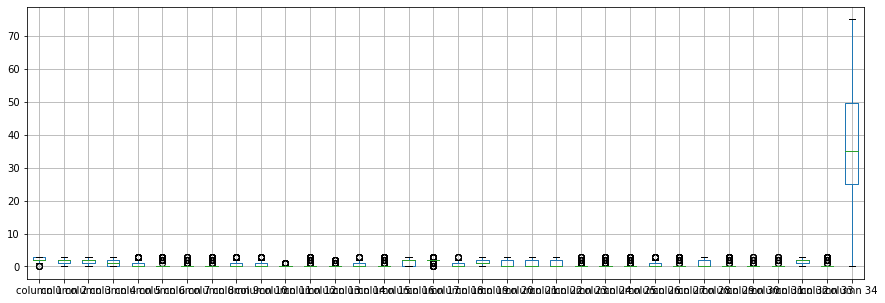

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      2.078212
column 2      1.807263
column 3      1.569832
column 4      1.354749
column 5      0.636872
column 6      0.473684
column 7      0.152941
column 8      0.419142
column 9      0.622905
column 10     0.530726
column 11     0.122905
column 12     0.424561
column 13     0.142458
column 14     0.547486
column 15     0.315642
column 16     1.368715
column 17     1.955307
column 18     0.511173
column 19     1.287709
column 20     0.662011
column 21     0.983240
column 22     0.650165
column 23     0.298883
column 24     0.368715
column 25     0.425743
column 26     0.474860
column 27     0.452145
column 28     0.949721
column 29     0.480263
column 30     0.094118
column 31     0.105611
column 32     1.877095
column 33     0.582456
column 34    36.296089
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,0.428769,0.248062,-0.033157,-0.008496,-0.000287,-0.138574,-0.037993,0.138519,0.180740,...,-0.054319,0.153229,-0.035395,0.038837,-0.017685,-0.024784,-0.010433,0.093026,-0.037333,-0.005028
column 2,0.428769,1.000000,0.347106,-0.072191,-0.009033,-0.060815,-0.105308,-0.084097,0.294258,0.295932,...,-0.085605,0.205046,-0.094446,0.023095,-0.130222,-0.020924,-0.033177,-0.008453,-0.132111,0.016006
column 3,0.248062,0.347106,1.000000,-0.058534,0.239778,0.322966,-0.155242,0.284123,0.301187,0.261495,...,0.293720,0.350007,0.284911,-0.252643,0.260918,-0.061969,-0.141396,0.124812,0.279917,0.138493
column 4,-0.033157,-0.072191,-0.058534,1.000000,0.280039,0.431956,-0.143673,0.373782,-0.296824,-0.152562,...,0.381553,-0.190548,0.387101,0.003028,0.387551,-0.164614,-0.176645,0.051553,0.407812,0.048053
column 5,-0.008496,-0.009033,0.239778,0.280039,1.000000,0.435819,-0.164288,0.411557,-0.065438,0.013496,...,0.409668,0.002588,0.417444,0.006726,0.385770,-0.137987,-0.152441,0.110295,0.414345,0.081162
column 6,-0.000287,-0.060815,0.322966,0.431956,0.435819,1.000000,-0.128021,0.878044,-0.267153,-0.266042,...,0.882073,-0.121430,0.898063,0.144372,0.878299,-0.077068,-0.093022,0.256148,0.905489,0.069663
column 7,-0.138574,-0.105308,-0.155242,-0.143673,-0.164288,-0.128021,1.000000,-0.131059,0.202488,-0.033154,...,-0.107666,-0.154910,-0.131461,-0.023173,-0.132752,0.770217,0.827146,-0.089611,-0.117865,-0.338682
column 8,-0.037993,-0.084097,0.284123,0.373782,0.411557,0.878044,-0.131059,1.000000,-0.288826,-0.267176,...,0.889142,-0.118539,0.914268,0.162688,0.890841,-0.068534,-0.091890,0.298668,0.905914,0.103605
column 9,0.138519,0.294258,0.301187,-0.296824,-0.065438,-0.267153,0.202488,-0.288826,1.000000,0.659286,...,-0.263997,0.480594,-0.276846,-0.417851,-0.274261,0.210507,0.292606,-0.079246,-0.272832,-0.078267
column 10,0.180740,0.295932,0.261495,-0.152562,0.013496,-0.266042,-0.033154,-0.267176,0.659286,1.000000,...,-0.265654,0.485260,-0.265700,-0.425421,-0.262023,-0.077484,-0.029246,0.027887,-0.270930,0.036412


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+21,34+21+21,34+21+21+21,34+21+21+21+21,34+21+21+21+21+21,34+21+21+21+21+21+21,34+21+21+21+21+21+21+21,34+21+21+21+21+21+21,34+21+21+21+21+21,34+21+21+21+21,34+21+21+21,34+21+21,34+21,34], vae_layer = False, seed = 21)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 75.19792348688298
Epoch: 1 , loss: 74.97028142755681
Epoch: 2 , loss: 75.05548962679777
Epoch: 3 , loss: 74.69570194591175
Epoch: 4 , loss: 74.6985310641202
Epoch: 5 , loss: 74.80990357832475
Epoch: 6 , loss: 74.57400304620916
Epoch: 7 , loss: 74.07310728593306
Epoch: 8 , loss: 72.55369671908292
Epoch: 9 , loss: 69.49306661432439
Epoch: 10 , loss: 68.49144744873047
Epoch: 11 , loss: 67.13888237693094
Epoch: 12 , loss: 66.57227464155717
Epoch: 13 , loss: 66.67739694768733
Epoch: 14 , loss: 65.5135629827326
Epoch: 15 , loss: 65.69198504361239
Epoch: 16 , loss: 65.14579200744629
Epoch: 17 , loss: 65.19862469759855
Epoch: 18 , loss: 65.06940616260876
Epoch: 19 , loss: 64.6581188548695
Epoch: 20 , loss: 64.60133483193137
Epoch: 21 , loss: 64.23633714155717
Epoch: 22 , loss: 63.7647086056796
Epoch: 23 , loss: 64.05849266052246
Epoch: 24 , loss: 63.33761301907626
Epoch: 25 , loss: 63.341074510054156
Epoch: 26

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(358, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      2.0
column 2      1.0
column 3      1.0
column 4      1.0
column 5      0.0
column 6      0.0
column 7      2.0
column 8      0.0
column 9      3.0
column 10     2.0
column 11     0.0
column 12     0.0
column 13     0.0
column 14     1.0
column 15     0.0
column 16     1.0
column 17     1.0
column 18     1.0
column 19     1.0
column 20     0.0
column 21     0.0
column 22     0.0
column 23     0.0
column 24     0.0
column 25     0.0
column 26     0.0
column 27     0.0
column 28     0.0
column 29     0.0
column 30     0.0
column 31     1.0
column 32     1.0
column 33     1.0
column 34    12.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\DERM.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0,0,0,0,0,0.241443,0.000000,0.226283,0,0,...,0.000000,0,0.256237,0,0.291005,0.000000,-0.035072,0,-1.651268,0
1,0,0,0,0,0,0.000000,0.000000,0.000000,0,0,...,0.000000,0,0.000000,0,0.000000,0.000000,0.000000,0,0.000000,0
2,0,0,0,0,0,0.000000,0.000000,0.000000,0,0,...,0.000000,0,0.000000,0,0.000000,0.000000,0.000000,0,0.000000,0
3,0,0,0,0,0,0.162454,0.000000,0.148921,0,0,...,0.000000,0,0.195618,0,0.218022,0.000000,-2.013487,0,0.258752,0
4,0,0,0,0,0,0.000000,0.000000,0.000000,0,0,...,0.000000,0,0.000000,0,0.000000,0.000000,0.000000,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0,0,0,0,0,0.000000,0.000000,0.000000,0,0,...,0.000000,0,0.000000,0,0.000000,0.000000,0.000000,0,0.000000,0
354,0,0,0,0,0,0.218467,0.000000,0.226750,0,0,...,0.183891,0,0.262585,0,0.000000,0.000000,-0.026214,0,0.336598,0
355,0,0,0,0,0,0.223719,0.057218,0.211879,0,0,...,0.192734,0,0.000000,0,0.247882,-0.001795,0.000000,0,0.300142,0
356,0,0,0,0,0,0.215721,0.000000,0.000000,0,0,...,0.157373,0,0.195872,0,0.217186,0.000000,0.002987,0,0.295373,0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(21.4868407440322, 758.0725558942231)

In [17]:
NRMS=numerator/denominator
NRMS


0.028344042502219727

In [18]:
new_df.iloc[66,:]

column 1      2.000000
column 2      0.000000
column 3      0.000000
column 4      3.000000
column 5      0.000000
column 6      0.162488
column 7      0.064882
column 8      0.177778
column 9      0.000000
column 10     0.000000
column 11     0.000000
column 12     0.158783
column 13     0.000000
column 14     0.000000
column 15     2.000000
column 16     2.000000
column 17     2.000000
column 18     0.000000
column 19     0.000000
column 20     0.000000
column 21     3.000000
column 22     0.000000
column 23     0.000000
column 24     0.000000
column 25     0.152647
column 26     0.000000
column 27     0.000000
column 28     0.000000
column 29     0.202951
column 30     0.003927
column 31     0.000000
column 32     2.000000
column 33     0.249323
column 34    22.000000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,1,1,1,1,0.241443,0.000000,0.226283,2,2,...,0.000000,0,0.256237,0,0.291005,0.000000,-0.035072,0,0.348732,0
1,1,1,2,0,0,0.000000,3.000000,0.000000,3,0,...,0.000000,0,0.000000,0,0.000000,2.000000,2.000000,2,0.000000,7
2,2,2,1,0,0,0.000000,3.000000,0.000000,2,0,...,0.000000,0,0.000000,2,0.000000,3.000000,3.000000,2,0.000000,7
3,2,2,2,1,0,0.162454,2.000000,0.148921,2,2,...,0.000000,0,0.195618,2,0.218022,2.000000,-0.013487,2,0.258752,7
4,2,2,1,0,0,0.000000,2.000000,0.000000,2,0,...,0.000000,0,0.000000,3,0.000000,2.000000,2.000000,2,0.000000,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2,2,0,2,1,0.000000,0.000000,0.000000,0,0,...,0.000000,0,0.000000,3,0.000000,0.000000,0.000000,3,0.000000,70
354,2,3,2,0,0,0.218467,0.000000,0.226750,3,2,...,0.183891,0,0.262585,0,0.000000,0.000000,-0.026214,1,0.336598,70
355,2,2,2,1,0,0.223719,0.057218,0.211879,0,0,...,0.192734,0,0.000000,2,0.247882,-0.001795,0.000000,2,0.300142,70
356,2,1,0,3,0,0.215721,0.000000,0.000000,0,0,...,0.157373,0,0.195872,0,0.217186,0.000000,0.002987,1,0.295373,70


In [20]:
imputations[-1].to_excel("DERM_AW_5(imp).xlsx", index=False, header=False)